In [1]:
!wget https://www.dropbox.com/sh/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca?dl=0

--2020-04-16 16:04:30--  https://www.dropbox.com/sh/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca [following]
--2020-04-16 16:04:31--  https://www.dropbox.com/sh/raw/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uceda7b8206bcec6af35e5f606c9.dl.dropboxusercontent.com/zip_download_get/AZUrBVz7iu6r92JzGBakO7LOKvkW00YMQPERQ1IoS2gRxIFGoTMEOyAJchJbY5TQgfEtEenAa9QHY1UFv1D_EeD9sErOGNG_m2qigDX49xFtEg [following]
--2020-04-16 16:04:32--  https://uceda7b8206bcec6af35e5f606c9.dl.dropboxusercontent.com/zip_download_get/AZUrBVz7iu6r92JzGBakO7LOKvkW00YMQPERQ1IoS2gRxIFGoTMEOyAJchJbY5TQgfEtEenAa9QHY1UFv1D_

In [2]:

!unzip AABXTlPlU-1f4L_VdS4wY06ca?dl=0

Archive:  AABXTlPlU-1f4L_VdS4wY06ca?dl=0
mapname:  conversion of  failed
   creating: Images/
   creating: Images/cats/
   creating: Images/dogs/
   creating: Images/horses/
   creating: Images/humans/
 extracting: Images/cats/cat.3.jpg   
 extracting: Images/dogs/dog.3.jpg   
 extracting: Images/cats/cat.8.jpg   
 extracting: Images/dogs/dog.8.jpg   
 extracting: Images/cats/cat.5.jpg   
 extracting: Images/dogs/dog.5.jpg   
 extracting: Images/cats/cat.6.jpg   
 extracting: Images/dogs/dog.2.jpg   
 extracting: Images/dogs/dog.9.jpg   
 extracting: Images/dogs/dog.4.jpg   
 extracting: Images/cats/cat.1.jpg   
 extracting: Images/cats/cat.9.jpg   
 extracting: Images/dogs/dog.7.jpg   
 extracting: Images/cats/cat.4.jpg   
 extracting: Images/dogs/dog.6.jpg   
 extracting: Images/cats/cat.7.jpg   
 extracting: Images/dogs/dog.1.jpg   
 extracting: Images/cats/cat.2.jpg   
 extracting: Images/dogs/dog.82.jpg  
 extracting: Images/cats/cat.75.jpg  
 extracting: Images/cats/cat.45.jpg  


In [3]:
!ls 

'AABXTlPlU-1f4L_VdS4wY06ca?dl=0'   Images   sample_data


In [4]:
import os, shutil
folders = os.listdir("Images")
print(folders)

['dogs', 'humans', 'cats', 'horses']


In [5]:
from keras.preprocessing import image
import numpy as np

Using TensorFlow backend.


In [0]:
image_data =[]
labels =[]
label_dict ={'cats':0,
             'dogs':1,
             'horses':2,
             'humans':3}

In [0]:
for ix in folders:
  path = os.path.join('Images',ix)
  for im in os.listdir(path):
    img  = image.load_img(os.path.join(path,im),target_size=(224,224))
    img = image.img_to_array(img)
    image_data.append(img)
    labels.append(label_dict[ix])

In [8]:
print(len(image_data),len(labels))

808 808


In [0]:
# shuffleing our dataset
import random
combined = list(zip(image_data,labels))
random.shuffle(combined)

In [0]:
image_data[:],labels[:] = zip(*combined)

In [11]:
x_train = np.array(image_data)
y_train = np.array(labels)
print(x_train.shape,y_train.shape)

(808, 224, 224, 3) (808,)


In [0]:
# converting y_train to one hot labesls
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)

In [13]:
print(y_train.shape)

(808, 4)


In [0]:
# creating the resnet model

In [0]:
from keras.applications import ResNet50
from keras.optimizers import Adam
from keras.layers import *
from keras.models import Model

import matplotlib.pyplot as plt

In [16]:
model = ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3))  # to remove classificationkeep include_top = flase

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 2s 0us/step


In [17]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [0]:
# output feature has (7,7,2048)
#to convert it to (1,1,2048) we use global_average_pool 

In [19]:
av1 = GlobalAveragePooling2D()(model.output)
fc1 = Dense(256,activation='relu')(av1)
d1 = Dropout(0.5)(fc1)
fc2 = Dense(4,activation='softmax')(d1)

# now creating new model with new classifier and using Resnet 50 conv base
model_new = Model(input=model.input,output=fc2)
print(model_new.summary())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  import sys


In [0]:
# compiling the model
adam = Adam(learning_rate=0.00003)
model_new.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

In [0]:
# print all the layers to find till which point we want to freeze the conv layers

In [22]:
for ix in range(len(model_new.layers)):
  print(ix,model_new.layers[ix])

0 <keras.engine.input_layer.InputLayer object at 0x7fa9d8a1b3c8>
1 <keras.layers.convolutional.ZeroPadding2D object at 0x7fa9471ad278>
2 <keras.layers.convolutional.Conv2D object at 0x7fa9471ad748>
3 <keras.layers.normalization.BatchNormalization object at 0x7fa9471ad7b8>
4 <keras.layers.core.Activation object at 0x7fa9471adf28>
5 <keras.layers.convolutional.ZeroPadding2D object at 0x7fa9ea8c7f98>
6 <keras.layers.pooling.MaxPooling2D object at 0x7fa9471adef0>
7 <keras.layers.convolutional.Conv2D object at 0x7fa945702f28>
8 <keras.layers.normalization.BatchNormalization object at 0x7fa94572a3c8>
9 <keras.layers.core.Activation object at 0x7fa940ef1ac8>
10 <keras.layers.convolutional.Conv2D object at 0x7fa940ef1978>
11 <keras.layers.normalization.BatchNormalization object at 0x7fa940e81278>
12 <keras.layers.core.Activation object at 0x7fa940e91cc0>
13 <keras.layers.convolutional.Conv2D object at 0x7fa940eaaf60>
14 <keras.layers.convolutional.Conv2D object at 0x7fa940e42390>
15 <keras.lay

In [0]:
# ddoing the fine tuning part

In [0]:
for ix in range(169):
  model_new.layers[ix].trainable = False   # seeting it untrainable till 168th layer

In [0]:
# compiling the model again
adam = Adam(learning_rate=0.00003)
model_new.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

In [26]:
model_new.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [27]:
# training the model
hist = model_new.fit(x_train,y_train,shuffle=True,epochs=5,validation_split=0.2)

Train on 646 samples, validate on 162 samples
Epoch 1/5
646/646 [==============================] - 178s 275ms/step - loss: 1.4747 - accuracy: 0.3932 - val_loss: 0.8469 - val_accuracy: 0.7099
Epoch 2/5
646/646 [==============================] - 174s 269ms/step - loss: 0.8715 - accuracy: 0.6718 - val_loss: 0.4871 - val_accuracy: 0.8457
Epoch 3/5
646/646 [==============================] - 174s 269ms/step - loss: 0.5848 - accuracy: 0.7802 - val_loss: 0.3393 - val_accuracy: 0.8889
Epoch 4/5
646/646 [==============================] - 174s 269ms/step - loss: 0.4463 - accuracy: 0.8591 - val_loss: 0.2539 - val_accuracy: 0.9136
Epoch 5/5
646/646 [==============================] - 176s 272ms/step - loss: 0.3432 - accuracy: 0.8916 - val_loss: 0.2066 - val_accuracy: 0.9383


In [0]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss= hist.history['val_loss']


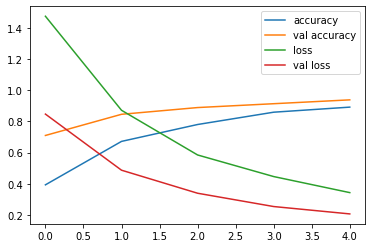

In [32]:
plt.plot(acc,label="accuracy")
plt.plot(val_acc,label="val accuracy")
plt.plot(loss,label='loss')
plt.plot(val_loss,label='val loss')
plt.legend()
plt.show()